In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

## National Data Initial EDA

In [3]:
df_national = pd.read_csv("data/National_Custom_Data.csv", thousands =',')

In [4]:
df_national.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,THRESHOLD,BASELINE,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [5]:
df_national['AGE GROUP'].unique()
# looks like no data is provided by age group at this level

array(['All'], dtype=object)

In [6]:
df_national.columns

Index(['AREA', 'SUB AREA', 'AGE GROUP', 'SEASON', 'WEEK', 'THRESHOLD',
       'BASELINE', 'PERCENT P&I', 'NUM INFLUENZA DEATHS',
       'NUM PNEUMONIA DEATHS', 'TOTAL DEATHS', 'PERCENT COMPLETE'],
      dtype='object')

In [7]:
df_national.columns = ['Area', 'Sub_Area','Age_Group', 
                      'Season', 'Week', 'Threshold', 'Baseline'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [8]:
df_national.columns

Index(['Area', 'Sub_Area', 'Age_Group', 'Season', 'Week', 'Threshold',
       'Baseline', 'Percent_P_I', 'Num_Influenza_Deaths',
       'Num_Pneumonia_Deaths', 'Total_Deaths', 'Percent_Complete'],
      dtype='object')

In [9]:
df_national.head()

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%


In [10]:
# Logic to add a Calendar Year Column
x = '2019-20'
int(x[0:4])
int(x[0:4])+1
#Week >=40 --> int(x[0:4])
#Week 1-39 --> int(x[0:4])+1

2020

In [11]:
conditions = [
    df_national['Week']<40,
    df_national['Week']>=40    
]

In [12]:
df_national['First_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])) 

In [13]:
df_national['Second_Year'] = df_national['Season'].apply(lambda x: int(x[0:4])+1) 

In [14]:
choices = [df_national['Second_Year'],df_national['First_Year']]

In [15]:
df_national['Calendar_Year'] = np.select(conditions,choices)

In [16]:
df_national.sample(10)

,Area,Sub_Area,Age_Group,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,First_Year,Second_Year,Calendar_Year
144,National,NaN,All,2016-17,3,7.8,7.5,8.4,373,4621,59293,> 100%,2016,2017,2017
263,National,NaN,All,2014-15,17,7.8,7.4,7.2,50,3652,51466,> 100%,2014,2015,2015
94,National,NaN,All,2017-18,5,7.7,7.3,10.2,1360,4877,60974,> 100%,2017,2018,2018
179,National,NaN,All,2016-17,38,5.9,5.6,5.8,16,2935,51229,> 100%,2016,2017,2017
233,National,NaN,All,2014-15,40,6.7,6.2,6.4,6,3075,48359,> 100%,2014,2015,2014
122,National,NaN,All,2017-18,33,5.6,5.2,5.2,5,2617,50301,> 100%,2017,2018,2018
235,National,NaN,All,2014-15,42,6.9,6.4,6.3,13,3084,49224,> 100%,2014,2015,2014
162,National,NaN,All,2016-17,21,6.8,6.4,6.1,24,3091,50972,> 100%,2016,2017,2017
289,National,NaN,All,2013-14,43,7.1,6.7,6.6,11,3151,47746,> 100%,2013,2014,2013
134,National,NaN,All,2016-17,45,6.8,6.4,6.1,19,3207,52524,> 100%,2016,2017,2016


In [17]:
# df_national.drop('First_Year', axis = 1, inplace = True)
# df_national.drop('Second_Year', axis = 1, inplace = True)
# df_national.drop('Sub_Area', axis = 1, inplace = True)
# df_national.drop('Age_Group', axis = 1, inplace = True)
                 

In [18]:
df_national.head()

,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,National,2019-20,40,5.7,5.3,5.2,16,2703,52452,> 100%,2019
1,National,2019-20,41,5.7,5.4,5.3,16,2769,52860,> 100%,2019
2,National,2019-20,42,5.8,5.5,5.5,18,2976,54129,> 100%,2019
3,National,2019-20,43,5.9,5.6,5.6,30,2985,53914,> 100%,2019
4,National,2019-20,44,6.0,5.7,5.4,31,2907,53980,> 100%,2019


In [19]:
df_national.dtypes

Area                     object
Season                   object
Week                      int64
Threshold               float64
Baseline                float64
Percent_P_I             float64
Num_Influenza_Deaths      int64
Num_Pneumonia_Deaths      int64
Total_Deaths              int64
Percent_Complete         object
Calendar_Year             int64
dtype: object

In [20]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
Area                    338 non-null object
Season                  338 non-null object
Week                    338 non-null int64
Threshold               338 non-null float64
Baseline                338 non-null float64
Percent_P_I             338 non-null float64
Num_Influenza_Deaths    338 non-null int64
Num_Pneumonia_Deaths    338 non-null int64
Total_Deaths            338 non-null int64
Percent_Complete        338 non-null object
Calendar_Year           338 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 29.2+ KB


In [21]:
df_national.describe()

,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,2016.482249
std,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,1.904542
min,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,2013.000000
25%,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,2015.000000
50%,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,2016.000000
75%,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,2018.000000
max,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,2020.000000


In [22]:
years = list(df_national['Calendar_Year'].unique())
years.sort()


Text(0, 0.5, 'Total US Deaths')

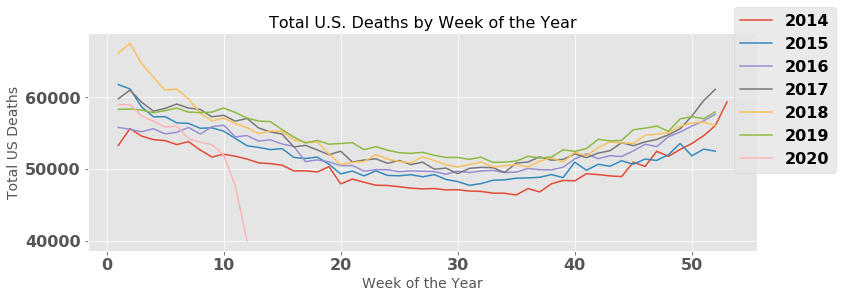

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))


for year in years[1:]:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']
    
    ax.plot(x,y, label = year)

    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(y=50000, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year", fontsize = 16)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total US Deaths", fontsize = 14)

Text(0, 0.5, '%Deaths due to Flu&Pneumonia')

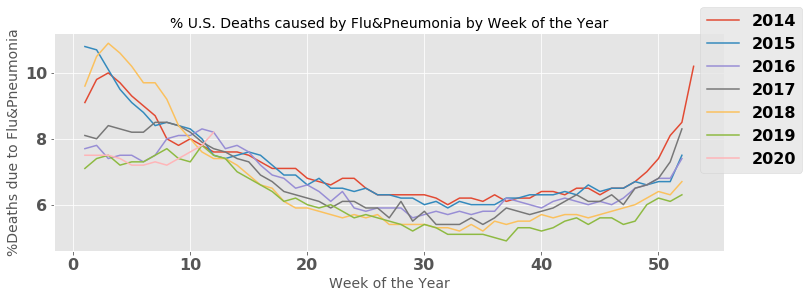

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))


for year in years[1:]:
    mask = df_national['Calendar_Year'] == year
    df = df_national[mask].sort_values('Week')
    x = df['Week']
    y = df['Percent_P_I']

    ax.plot(x,y, label = year)

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

ax.set_title("% U.S. Deaths caused by Flu&Pneumonia by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("%Deaths due to Flu&Pneumonia", fontsize = 14)

In [25]:
#finding out how many weeks have <100% completeness
mask_national_incomplete = df_national['Percent_Complete'] != '> 100%'

In [26]:
df_national_incomplete_wks = df_national[mask_national_incomplete]

In [27]:
df_national_incomplete_wks.describe()

,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Calendar_Year
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,31.000000,6.606250,6.212500,6.412500,25.187500,2954.937500,46626.500000,2014.250000
std,6.947422,0.248914,0.265518,0.509738,81.592662,98.506493,1796.560937,1.570563
min,12.000000,6.400000,6.000000,6.000000,1.000000,2812.000000,40002.000000,2013.000000
25%,27.750000,6.400000,6.000000,6.200000,3.000000,2872.250000,46772.000000,2014.000000
50%,31.500000,6.500000,6.100000,6.300000,5.000000,2949.500000,47110.000000,2014.000000
75%,35.250000,6.800000,6.400000,6.350000,6.250000,2989.000000,47295.000000,2014.000000
max,41.000000,7.200000,6.900000,8.200000,331.000000,3140.000000,47540.000000,2020.000000


In [28]:
df_national_incomplete_wks.head(16)
# looks like I can only go through Week 11 in National Data. 2014 data looks to be missing around 2%

,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
24,National,2019-20,12,7.2,6.9,8.2,331,2930,40002,84.1%,2020
286,National,2013-14,40,6.8,6.4,6.6,3,3140,47492,99.8%,2013
287,National,2013-14,41,6.9,6.5,6.7,12,3135,47304,99.4%,2013
323,National,2013-14,25,6.9,6.5,6.5,7,3070,47540,99.9%,2014
324,National,2013-14,26,6.8,6.4,6.3,3,2989,47341,99.5%,2014
325,National,2013-14,27,6.7,6.3,6.3,6,2989,47240,99.3%,2014
326,National,2013-14,28,6.6,6.2,6.3,4,2982,47292,99.4%,2014
327,National,2013-14,29,6.5,6.1,6.3,7,2939,47098,99%,2014
328,National,2013-14,30,6.5,6.1,6.3,3,2983,47122,99%,2014
329,National,2013-14,31,6.4,6.0,6.2,5,2919,46936,98.6%,2014


In [29]:
df_national['Percent_Complete'] = df_national['Percent_Complete'].str.replace('> 100%', '100%', regex=False)

In [30]:
df_national['Percent_Complete'] = df_national['Percent_Complete'].str.rstrip('%').astype('float') / 100.0

In [31]:
df_national.describe()

,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,0.999047,2016.482249
std,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,0.009027,1.904542
min,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,0.841000,2013.000000
25%,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,1.000000,2015.000000
50%,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,1.000000,2016.000000
75%,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,1.000000,2018.000000
max,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,1.000000,2020.000000


In [32]:
df_national_official = df_national.sort_values(['Calendar_Year','Week']).reset_index()

In [33]:
df_national_official.head()

,index,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,286,National,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013
1,287,National,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013
2,288,National,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013
3,289,National,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013
4,290,National,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013


In [34]:
# df_national_official.drop('index', axis = 1, inplace = True)


In [35]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
0,National,2013-14,40,6.8,6.4,6.6,3,3140,47492,0.998,2013
1,National,2013-14,41,6.9,6.5,6.7,12,3135,47304,0.994,2013
2,National,2013-14,42,7.0,6.6,6.8,11,3216,47602,1.000,2013
3,National,2013-14,43,7.1,6.7,6.6,11,3151,47746,1.000,2013
4,National,2013-14,44,7.2,6.8,6.7,12,3271,48777,1.000,2013


In [36]:
df_national_official.describe()

,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete,Calendar_Year
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,26.618343,6.976331,6.600296,6.771893,154.562130,3445.701183,52804.973373,0.999047,2016.482249
std,15.507610,0.838981,0.824855,1.175849,259.909498,620.111191,3657.505221,0.009027,1.904542
min,1.000000,5.400000,5.100000,4.900000,1.000000,2511.000000,40002.000000,0.841000,2013.000000
25%,13.000000,6.300000,5.900000,5.900000,11.000000,2982.000000,50259.000000,1.000000,2015.000000
50%,27.000000,7.000000,6.600000,6.500000,30.500000,3234.000000,52106.000000,1.000000,2016.000000
75%,40.750000,7.600000,7.200000,7.500000,205.250000,3848.000000,55235.500000,1.000000,2018.000000
max,53.000000,8.600000,8.200000,10.900000,1626.000000,5589.000000,67495.000000,1.000000,2020.000000


In [37]:
mask = df_national_official['Percent_Complete'] <1
df_national_incomplete = df_national_official[mask]
df_national_incomplete.describe()
df_national_incomplete.groupby('Calendar_Year').count()

,Area,Season,Week,Threshold,Baseline,Percent_P_I,Num_Influenza_Deaths,Num_Pneumonia_Deaths,Total_Deaths,Percent_Complete
Calendar_Year,,,,,,,,,,
2013,2,2,2,2,2,2,2,2,2,2
2014,13,13,13,13,13,13,13,13,13,13
2020,1,1,1,1,1,1,1,1,1,1


In [38]:
df_national_incomplete.groupby('Calendar_Year').mean()['Percent_Complete']

Calendar_Year
2013    0.996000
2014    0.988077
2020    0.841000
Name: Percent_Complete, dtype: float64

In [46]:
label = list(df_national_official['Week'].unique())

In [51]:
labels = sorted(label)
labels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [53]:
labels[0:11]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [61]:
mask = (df_national_official['Week'] == 1) & (df_national_official['Calendar_Year'] == 2019)

In [67]:
x = df_national_official[mask]['Total_Deaths']

In [72]:
x.iloc[0]

274    58289
Name: Total_Deaths, dtype: int64

58289

In [73]:
years[1:]

[2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [97]:
death_lst = []
year_lst = []
week_lst = []

for i in range(1,len(labels[0:11])+1):
    for year in years[1:]:
        mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_Year'] == year)
        df = df_national_official[mask]
        death_lst.append(df['Total_Deaths'].iloc[0])
        year_lst.append(year)
        week_lst.append(i)

In [99]:
y_w_d = []
for y, w, d in zip(year_lst,week_lst,death_lst):
    y_w_d.append((y,w,d))

In [100]:
y_w_d

[(2014, 1, 53277),
 (2015, 1, 61737),
 (2016, 1, 55788),
 (2017, 1, 59763),
 (2018, 1, 66134),
 (2019, 1, 58289),
 (2020, 1, 58961),
 (2014, 2, 55620),
 (2015, 2, 61141),
 (2016, 2, 55525),
 (2017, 2, 60980),
 (2018, 2, 67495),
 (2019, 2, 58351),
 (2020, 2, 58962),
 (2014, 3, 54580),
 (2015, 3, 58628),
 (2016, 3, 55182),
 (2017, 3, 59293),
 (2018, 3, 64647),
 (2019, 3, 58193),
 (2020, 3, 57371),
 (2014, 4, 54085),
 (2015, 4, 57269),
 (2016, 4, 55606),
 (2017, 4, 58047),
 (2018, 4, 62780),
 (2019, 4, 57834),
 (2020, 4, 56666),
 (2014, 5, 53955),
 (2015, 5, 57284),
 (2016, 5, 54896),
 (2017, 5, 58432),
 (2018, 5, 60974),
 (2019, 5, 58122),
 (2020, 5, 55849),
 (2014, 6, 53397),
 (2015, 6, 56420),
 (2016, 6, 55106),
 (2017, 6, 59038),
 (2018, 6, 61110),
 (2019, 6, 58489),
 (2020, 6, 55992),
 (2014, 7, 53815),
 (2015, 7, 56348),
 (2016, 7, 55785),
 (2017, 7, 58479),
 (2018, 7, 59779),
 (2019, 7, 57915),
 (2020, 7, 54246),
 (2014, 8, 52642),
 (2015, 8, 55668),
 (2016, 8, 54873),
 (2017, 8, 5

In [111]:

deaths_2014 = []
deaths_2015 = []
deaths_2016 = []
deaths_2017 = []
deaths_2018 = []
deaths_2019 = []
deaths_2020 = [] 


for y,w,d in y_w_d:
    if y == 2014:
        deaths_2014.append(d)
    elif y == 2015:
        deaths_2015.append(d)
    elif y == 2016:
        deaths_2016.append(d)
    elif y == 2017:
        deaths_2017.append(d)
    elif y == 2018:
        deaths_2018.append(d)
    elif y == 2019:
        deaths_2019.append(d)
    elif y == 2020:
        deaths_2020.append(d)

In [112]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

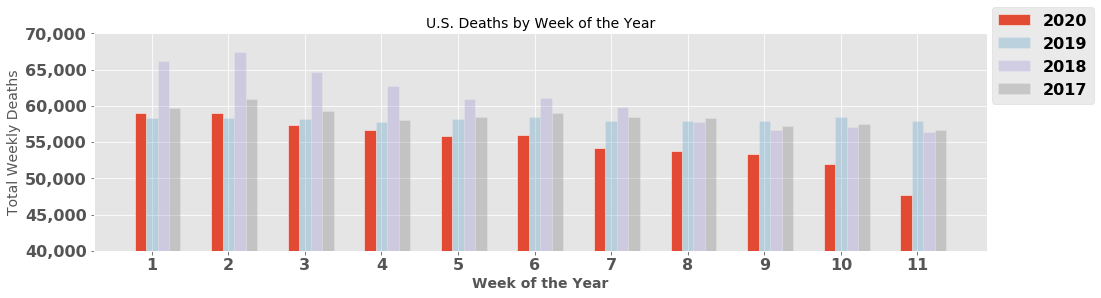

In [142]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = deaths_2020
bars2 = deaths_2019
bars3 = deaths_2018
bars4 = deaths_2017

weeks = labels[0:11]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2020')
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2019', alpha = 0.25)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2018', alpha = 0.3)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', alpha = 0.3)

 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Weekly Deaths", fontsize = 14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])
plt.show()

## State Level Data Initial EDA

In [ ]:
df_states = pd.read_csv("data/State_Custom_Data.csv", thousands =',')

In [ ]:
df_states.head()

In [ ]:
df_states.columns

In [ ]:
df_states.columns = ['Area', 'State','Age_Group', 
                      'Season', 'Week'
                     ,'Percent_P_I', 'Num_Influenza_Deaths',
                     'Num_Pneumonia_Deaths','Total_Deaths', 'Percent_Complete']
#rename columns to remove spaces

In [ ]:
df_states.columns

In [ ]:
df_states.head()

In [ ]:
df_states['Area'].unique()

In [ ]:
df_states['Age_Group'].unique()

In [ ]:
conditions = [
    df_states['Week']<40,
    df_states['Week']>=40    
]



In [ ]:
df_states['First_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])) 
df_states['Second_Year'] = df_states['Season'].apply(lambda x: int(x[0:4])+1) 


In [ ]:
choices = [df_states['Second_Year'],df_states['First_Year']]


In [ ]:
df_states['Calendar_Year'] = np.select(conditions,choices)

In [ ]:
df_states.head()

In [ ]:
# df_states.drop('First_Year', axis = 1, inplace = True)
# df_states.drop('Second_Year', axis = 1, inplace = True)
# df_states.drop('Age_Group', axis = 1, inplace = True)
# df_states.drop('Area', axis = 1, inplace = True)

In [ ]:
df_states.describe()

In [ ]:
df_states.info()

In [ ]:
df_states['State'].unique()

In [ ]:
mask = df_states['State'] == 'North Carolina'
df_nc = df_states[mask]

In [ ]:
df_states.info()

In [ ]:
df_nc[df_nc['Calendar_Year']== 2020]

In [ ]:
insufficient_data_rows = df_nc['Total_Deaths'] == 'Insufficient Data'

In [ ]:
df_nc_insufficient_data = df_nc[insufficient_data_rows]

In [ ]:
df_nc_insufficient_data.head()

In [ ]:
df_nc_insufficient_data.describe()
# In North Carolina's case, there are 5 weeks with "Insufficient Data..i.e. <20% reporting. This runs through weeks 8-12 of 2020 -  starting on Feb 16"

In [ ]:
len(df_nc_insufficient_data.index)

In [ ]:
# Now I want to see how many weeks have insufficient data by State

df_states.describe()

In [ ]:
list_of_states = list(df_states['State'].unique())
list_of_states

In [ ]:
state_dict_mw = {} #missing week dictionary

for state in list_of_states:
    state_mask = df_states['State'] == state
    df_state_specific = df_states[state_mask] #create DF by State
    
    insufficient_data_weeks = df_state_specific['Total_Deaths'] == 'Insufficient Data' 
    df_state_insufficient_data = df_state_specific[insufficient_data_weeks] #create DF by state by only rows w/ insufficient data
    
    num_weeks_wo_data = len(df_state_insufficient_data.index)
    
    state_dict_mw[state] = num_weeks_wo_data
    
    

In [ ]:
state_dict_mw

In [ ]:
sufficient_data_rows = df_states['Total_Deaths'] != 'Insufficient Data'

In [ ]:
df_states_cleaned = df_states[sufficient_data_rows]

In [ ]:
df_states_cleaned.describe()

In [ ]:
df_states_cleaned.head()

In [ ]:
df_states_cleaned['Total_Deaths'].str.replace(',', '', regex=True)

In [ ]:
df_states_official = df_states_cleaned.replace(to_replace =',', value = '', regex = True) 


In [ ]:
df_states_official.head()

In [ ]:
df_states_official[['Num_Influenza_Deaths','Num_Pneumonia_Deaths','Total_Deaths','Calendar_Year']] = df_states_official[['Num_Influenza_Deaths','Num_Pneumonia_Deaths','Total_Deaths','Calendar_Year']].astype(int)

In [ ]:
df_states_official.head()

In [ ]:
df_states_official.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))


for year in years[1:]:
    mask = (df_states_official['Calendar_Year'] == year) & (df_states_official['State'] =='New York')
    
    df = df_states_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']

    
    ax.plot(x,y, label = year)
    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

ax.set_title("Total New York Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Deaths in New York", fontsize = 14)


In [ ]:
mask = (df_states_official['Calendar_Year'] == 2020) & (df_states_official['State'] =='New York')
df = df_states_official[mask].sort_values('Week')

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))


for year in years[1:]:
    mask = (df_states_official['Calendar_Year'] == year) & (df_states_official['State'] =='California')
    
    df = df_states_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_Deaths']

    
    ax.plot(x,y, label = year)
    
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
ax.set_title("Total California Deaths by Week of the Year", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Deaths in California", fontsize = 14)


In [ ]:
mask = (df_states_official['Calendar_Year'] == 2020) & (df_states_official['State'] =='California')
df = df_states_official[mask].sort_values('Week')
df

In [ ]:
df_states_official.describe()

In [ ]:
mask_state_incomplete = df_states_official['Percent_Complete'] != '> 100%'

In [ ]:
df_state_incomplete = df_states_official[mask_state_incomplete]

In [ ]:
df_state_incomplete.describe()

In [ ]:
df_state_incomplete.head()

In [ ]:
df_state_incomplete.groupby('State').count()['Week']

In [ ]:
mask = df_state_incomplete['State'] == 'California'
df_state_incomplete[mask].sort_values(['Calendar_Year','Week'])

In [ ]:
df_states_official.describe()

In [ ]:
df_states_official.head()

In [ ]:
df_states_official['Percent_Complete'] = df_states_official['Percent_Complete'].str.replace('> 100%', '100%', regex=False)

In [ ]:
df_states_official.head()

In [ ]:
df_states_official['Percent_Complete'].unique()

In [ ]:
df_states_official['Percent_Complete'] = df_states_official['Percent_Complete'].str.rstrip('%').astype('float') / 100.0

In [ ]:
df_states_official['Percent_Complete'].unique()

In [ ]:
df_states_official.describe()

In [ ]:
df_states_official.head()

In [ ]:
df_states_official.sort_values(['State','Calendar_Year','Week']).reset_index()

In [ ]:
df_states_official = df_states_official.sort_values(['State','Calendar_Year','Week']).reset_index()

In [ ]:
# df_states_official.drop('index', axis = 1, inplace = True)


In [ ]:
df_states_official.head()

In [ ]:
df_states_official.describe()
#only permanent change from original data set was removing 11 rows for Connecticut, 5 for NC, and 1 for WV when they had Insufficient Data Values

In [ ]:
mask = df_states_official['Percent_Complete'] <1.0
df_states_incomplete = df_states_official[mask]

df_states_incomplete.groupby('State').count()['Week']

In [ ]:
df_states_incomplete.groupby('State').mean()['Percent_Complete']

In [ ]:
mask = df_states_official['Percent_Complete'] <.98
df_states_incomplete = df_states_official[mask]

df_states_incomplete.groupby('State').count()